In [1]:
import numpy as np
import pandas as pd

In [2]:
file_name = "/workspaces/codex-analysis/0-phenocycler-penntmc-pipeline/out/output_dev/patches_ndarray.npy"
all_patches_ndarray = np.load(file_name)
# Check the shape of the loaded array
print(f"Loaded array shape: {all_patches_ndarray.shape}")

Loaded array shape: (663, 1440, 1920, 2)


In [3]:
file_name = "/workspaces/codex-analysis/0-phenocycler-penntmc-pipeline/out/output_dev/patches_metadata.csv"
patches_metadata_df = pd.read_csv(file_name)
patches_metadata_df

,patch_id,height,width,nuclear_mean,nuclear_std,nuclear_non_zero_perc,wholecell_mean,wholecell_std,wholecell_non_zero_perc,is_empty,is_noisy,is_bad_patch
0,0,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
1,1,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
2,2,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
3,3,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
4,4,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
658,658,1440,1920,0.056629,0.233811,0.056006,0.005014,0.150439,0.002147,False,True,True
659,659,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
660,660,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
661,661,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True


In [4]:
# Select the patches based on the metadata. is_bad_patch should be False
all_patches_ndarray = all_patches_ndarray[patches_metadata_df.is_bad_patch == False]
all_patches_ndarray.shape

(360, 1440, 1920, 2)

In [5]:
from deepcell.applications import Mesmer
from tensorflow.keras.models import load_model
file_name = "/workspaces/codex-analysis/data/deepcell/MultiplexSegmentation"
keras_model = load_model(file_name)
app = Mesmer(model=keras_model)
app.logger.setLevel('DEBUG')
print(app.logger.level)
app

2024-10-15 19:11:06.939432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-15 19:11:06.940029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-15 19:11:06.991085: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-15 19:11:06.991438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-15 19:11:06.991749: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

10


In [6]:
print('Training Resolution:', app.model_mpp, 'microns per pixel')

Training Resolution: 0.5 microns per pixel


In [6]:
segmentation_predictions = app.predict(all_patches_ndarray, image_mpp=0.5, compartment="both")

DEBUG:Mesmer:Pre-processed data with mesmer_preprocess in 126.83786560408771 s
2024-10-15 19:13:55.325959: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
DEBUG:Mesmer:Model inference finished in 645.9663248490542 s
DEBUG:Mesmer:Post-processing results with mesmer_postprocess and kwargs: {'whole_cell_kwargs': {'maxima_threshold': 0.075, 'maxima_smooth': 0, 'interior_threshold': 0.2, 'interior_smooth': 2, 'small_objects_threshold': 15, 'fill_holes_threshold': 15, 'radius': 2}, 'nuclear_kwargs': {'maxima_threshold': 0.1, 'maxima_smooth': 0, 'interior_threshold': 0.2, 'interior_smooth': 2, 'small_objects_threshold': 15, 'fill_holes_threshold': 15, 'radius': 2}, 'compartment': 'both'}
DEBUG:Mesmer:Post-processed results with mesmer_postprocess in 1197.1436500679702 s


In [9]:
segmentation_predictions.shape

(360, 1440, 1920, 2)

In [8]:
# Save the segmentation predictions
file_name = "/workspaces/codex-analysis/0-phenocycler-penntmc-pipeline/out/output_dev/segmentation_predictions.npy"
with open(file_name, 'wb') as f:
    np.save(f, segmentation_predictions)
segmentation_predictions

array([[[[   0,    0],
         [   0,    0],
         [   0,    0],
         ...,
         [   0,    0],
         [   0,    0],
         [   0,    0]],

        [[   0,    0],
         [   0,    0],
         [   0,    0],
         ...,
         [   0,    0],
         [   0,    0],
         [   0,    0]],

        [[   0,    0],
         [   0,    0],
         [   0,    0],
         ...,
         [   0,    0],
         [   0,    0],
         [   0,    0]],

        ...,

        [[   0,    0],
         [   0,    0],
         [   0,    0],
         ...,
         [   0,    0],
         [   0,    0],
         [   0,    0]],

        [[   0,    0],
         [   0,    0],
         [   0,    0],
         ...,
         [   0,    0],
         [   0,    0],
         [   0,    0]],

        [[   0,    0],
         [   0,    0],
         [   0,    0],
         ...,
         [   0,    0],
         [   0,    0],
         [   0,    0]]],


       [[[   0,    0],
         [   0,    0],
         [   0

In [10]:
from typing import List, Tuple
Image = np.ndarray

def _separate_batch(img_stack: Image) -> Tuple[List[Image], List[Image]]:
    n_imgs = img_stack.shape[0]
    cell_masks = []
    nuc_masks = []
    for i in range(0, n_imgs):
        cell_mask = img_stack[i, :, :, 0]
        nuc_mask = img_stack[i, :, :, 1]
        cell_masks.append(cell_mask)
        nuc_masks.append(nuc_mask)
    return cell_masks, nuc_masks

In [11]:
cell_masks, nuc_masks = _separate_batch(segmentation_predictions)
print(f"Cell masks: {len(cell_masks)}")
print(f"Nuclei masks: {len(nuc_masks)}")

Cell masks: 360
Nuclei masks: 360


In [13]:
from typing import List, Tuple
Image = np.ndarray
from skimage.segmentation import find_boundaries

def get_boundary(masks: List[Image]) -> List[Image]:
    boundaries = []
    for mask in masks:
        mask_boundary = find_boundaries(mask, mode="inner")
        mask_boundary_indexed = get_indexed_mask(mask, mask_boundary)
        boundaries.append(mask_boundary_indexed)
    return boundaries

def get_indexed_mask(mask, boundary):
    boundary = boundary * 1
    boundary_loc = np.where(boundary == 1)
    boundary[boundary_loc] = mask[boundary_loc]
    return boundary

In [14]:
cell_boundaries = get_boundary(cell_masks)

In [25]:
np.max(cell_boundaries[200])

5210

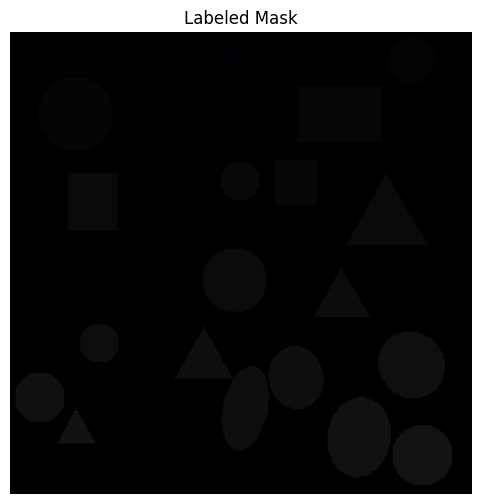

Number of objects detected: 19
Time taken: 0.0020 seconds

Object 1:
Number of pixels: 513
First 5 coordinates:
[[ 0 55  0]
 [ 0 55  1]
 [ 0 55  2]
 [ 0 56  0]
 [ 0 56  1]]

Object 2:
Number of pixels: 305
First 5 coordinates:
[[  2 115   0]
 [  2 116   0]
 [  2 117   0]
 [  2 118   0]
 [  2 119   0]]

Object 3:
Number of pixels: 305
First 5 coordinates:
[[  2 115   2]
 [  2 116   2]
 [  2 117   2]
 [  2 118   2]
 [  2 119   2]]


ValueError: Unsupported dtype

<Figure size 600x600 with 1 Axes>

In [27]:
# Import necessary libraries
import numpy as np
from skimage.measure import regionprops, label
from skimage.draw import random_shapes
import matplotlib.pyplot as plt
import time

# Define the _get_mask_coordinates function
def _get_mask_coordinates(mask: np.ndarray) -> List[np.ndarray]:
    """
    Get coordinates for each unique object in the mask using optimized functions.

    Args:
        mask (np.ndarray): The mask with unique identifiers for each object.

    Returns:
        List[np.ndarray]: List of coordinate arrays for each object (excluding background).
    """
    props = regionprops(mask)
    coords_list = [prop.coords for prop in props]
    return coords_list

# Generate a sample mask for testing
def generate_sample_mask(image_shape=(256, 256), num_shapes=20):
    """
    Generate a sample labeled mask with random shapes.

    Args:
        image_shape (tuple): The dimensions of the image.
        num_shapes (int): The number of shapes to generate.

    Returns:
        np.ndarray: A labeled mask with unique identifiers for each object.
    """
    # Generate a random image with shapes
    result = random_shapes(
        image_shape,
        max_shapes=num_shapes,
        min_shapes=num_shapes,
        min_size=20,
        max_size=50,
        intensity_range=((0, 255),)
    )

    # The generated image is a grayscale image with shapes filled in white (255) and background as black (0)
    # We need to invert it to make shapes as foreground (1) and background as 0
    image = result[0]
    binary_image = image != 255  # Shapes are foreground

    # Label the connected regions
    mask = label(binary_image)

    return mask

# Generate the sample mask
mask = generate_sample_mask()

# Display the mask
plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='nipy_spectral')
plt.title('Labeled Mask')
plt.axis('off')
plt.show()

# Test the _get_mask_coordinates function
start_time = time.time()
coords_list = _get_mask_coordinates(mask)
end_time = time.time()

print(f"Number of objects detected: {len(coords_list)}")
print(f"Time taken: {end_time - start_time:.4f} seconds")

# Print the coordinates of the first few objects
for i, coords in enumerate(coords_list[:3]):
    print(f"\nObject {i+1}:")
    print(f"Number of pixels: {len(coords)}")
    print(f"First 5 coordinates:\n{coords[:5]}")

# Optional: Visualize the coordinates of the first object
object_index = 0  # Change this to visualize a different object
coords = coords_list[object_index]
object_mask = np.zeros_like(mask, dtype=bool)
object_mask[coords[:, 0], coords[:, 1]] = True

plt.figure(figsize=(6, 6))
plt.imshow(object_mask, cmap='gray')
plt.title(f'Object {object_index+1}')
plt.axis('off')
plt.show()

In [28]:
coords

array([[ 0, 55,  0],
       [ 0, 55,  1],
       [ 0, 55,  2],
       ...,
       [15, 66,  0],
       [15, 66,  1],
       [15, 66,  2]])